# Homework 9 Programming - Hypothesis Testing

In this Jupyter notebook we take a first look at hypothesis testing. First introduced by statistician Ronald Fisher ([read the wiki](https://en.wikipedia.org/wiki/Ronald_Fisher)), hypothesis testing is a way to decide the validity of a hypothesis that is held to be true (*null hypothesis*) over an *alternative hypothesis*.

Consider the following example.

A company develops a new drug to treat a liver disease. The drug that is currently in use has a success rate of 
55%, i.e. every patient being treated would recover independently of others with probability 0.55. The manufacturer of the drug claims the new drug is more effective. Let $p$ be the probability with which a patient being treated with the new drug would recover. Consider the following null and alternative hypothesis:

- *Null hypothesis*: The new drug works with the same probability as the old one (p=0.55),
- *Alternative hypothesis*: The new drug works better than the old one, just like the company claims (p >0.55).

We would like to determine whether the company's claim is true. Note that there are two types of errors we could make in our judgement. We may either reject the null hypothesis, when in fact it is true, or we may accept the null hypothesis, when in fact it is false. These two types of error are called *type 1 error* and *type 2 error* respectively.

In order to test the company's hypothesis, MGH runs a trial, and tests the new drug on $n$ patients, and rejects the null hypothesis if the number of patients that recover is greater than or equal some number $m$ satisfying $1 \leq m \leq n$. Note that the number of patients that recovers is a binomial distribution with parameters $n$ and $p$ and hence, the probability of rejecting the null hypothesis, as a function of $p$ is given by:

$$    p_{reject} (p) =  \sum_{m \leq k \leq n} \binom{n}{k} p^k (1-p)^{n-k}$$

One should convince themselves that $p_{reject}(0.55)$ is the probability of making a type 1 error (given that the *null hypothesis* is true), and that increasing $m$ makes this quantity smaller. Intuitively, the more people we require to recover, in order to decide that the new drug is an improvement, the less likely we are that we will come to that conclusion. Therefore we would like to choose $m$ large enough to make $p_{reject}(0.55)$ small.

On the other hand, if the new drug is not more effective than the old one, we would like for the test to pass (and the for the *null hypothesis* to be confirmed). Since the probability of the test passing, is given by:

$$ p_{pass}(p) = 1- p_{reject}(p)$$

it decreases as we increase the value of $m$.

In summary, increasing the value of $m$, increases the chance of *type 2 error*, while decreasing the value of $m$ increases the chance of *type 1 error*.


In this exercise we will look at how to pick a value of $m$ that works well with this trade-off.

## Part (a)

Write a python function that computes the binomial coefficient $\binom{n}{k}$. The function should return the correct answer for any positive integer $n$ and $k$ where $k \leq n$.

In [9]:
import matplotlib.pyplot as plt

In [8]:
# your code here
def binomial(n,k):
    # returns the binomial coefficient nCk
    num = n-k
    fac_n = factorial(n)
    fac_k = factorial(k)
    fac_num = factorial(num)
    
    return fac_n/(fac_k*fac_num)

def factorial(num):
    #method to find the factorial of a number 

    factorial = 1
    
    if num == 0:
        return 1
    else:
        for i in range(1,num + 1):
            factorial = factorial*i
    return factorial 



1715884494940.0


## Part (b)

* Write a function that computes the probability of the test accepting the null hypothesis given fixed values of $m, n ,p$,
* Write another function that gives the probability of the test rejecting the null hypothesis given $m, n$ and $p$. 

You may use part (a) and you may call the first function from the second one (and/or viceversa).

In [31]:
# your code here

def accept(n,m,p):
    # returns the probability that k < m
    return 1 - reject(n,m,p)

def reject(n,m,p):
    #return the probability that k >=m
    q = 1-p
    k = m
    reject=0
    while(k<=n):
        binom = binomial(n,k)
        
        binom *= (p**k)*(q**(n-k))
        reject+=binom
        k+=1
    return reject

## Part (c)
Suppose that the number of people in the trial is 100. Then: 

* Plot a curve that shows how the probability of type 1 error changes with the choice of $m$, for $m=1,... n$ assuming that the null hypothesis holds (in red),
* On the same picture, plot the probability of type 2 error vs the value of $m$ in the case in which the new drug is effective with proability 0.68 (in blue).

You can plot the two curves using matplotlib.pyplot. You can select the color by passing color='r' or color='b' to the plt.plot() function.

In [71]:
n = 100

# your code here
def plot_curve():
    m=1
    x=[]
    type_1 = []
    type_2 =[]
    
    while(m<=n):
        prob_type_1 = reject(n,m,0.55)
        prob_type_2 = accept(n,m,0.68)
        x.append(m)
        type_1.append(prob_type_1)
        type_2.append(prob_type_2)
        m+=1
    plt.plot(x,type_1, color='r')
    plt.plot(x,type_2, color='b')
    


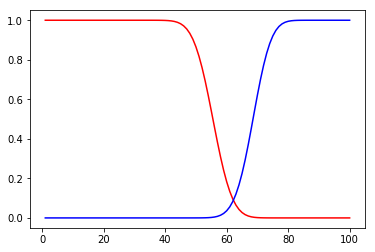

In [72]:
plot_curve()

## Part (d)

Based on the picture above, what value of $m$ do you think would be suitable to keep both type 1 and type 2 error small at the same time?

(You may assume that the company claims the new drug has 68% accuracy)

<b>Answer:</b> It seems that type_1 error is very high when m is between 0 and 40. At 40 it starts to go down linearly until it reaches 60. At 60 it is quite low at around 0.1 and beyone m=60 it approaches 0. 
It seems that type_2 error is very low until m=60. At m=60 it begins to go up linearly until it reaches close to m=75 where it goes to 1. It seems that an ideal m is somewhere between 60 and 65, at this level type 1 and type 2 errors are both kept at a minimum. So I would recommend m=62